# Objective :
# To extract and analyze restaurant reviews from a specific area.

## Part 1: Data Collection

I employed a TripAdvisor Chrome extension available at this link (http://bit.ly/3QfxhaT) to extract the most recent 25 reviews specifically for the Thakali restaurant, accessible at this URL (https://bit.ly/46RuhXs).

My initial attempts to retrieve data involved utilizing libraries such as Beautiful Soup for web scraping TripAdvisor reviews and the Google Places API to gather Google Maps reviews. However, these methods proved to be time-consuming and unsuccessful in extracting the desired data. Consequently, I resorted to employing browser extensions to efficiently acquire the necessary information.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:/restaurant_review/Thakali_review.csv')

In [3]:
df.head(10)

,User Name,User Profile,Rating,Review Title,Review,Date
0,BriandeRiancho,www.tripadvisor.com/Profile/BriandeRiancho,5,"Perfect for Truly Local, Inexpensive Nepali Food",For those seeking the truly authentic local st...,20-Feb-20
1,Quest02378445868,www.tripadvisor.com/Profile/Quest02378445868,5,Excellent food and service,"This restaurant was across from our hotel, Hot...",08-Jun-23
2,theGreatAdventurerr,www.tripadvisor.com/Profile/theGreatAdventurerr,5,Excellent thali,One of the best thali in town ! It's very good...,31-Dec-19
3,chewy3000,www.tripadvisor.com/Profile/chewy3000,5,Authentic Lunch in the busy city with hot refills,The Thakali Kitchen certainly is a hidden gem ...,19-Mar-18
4,Martin R,www.tripadvisor.com/Profile/Martin R,5,Best dal bhat in Kathmandu,"I was 3 months in Nepal - 4 weeks in Thamel, K...",19-May-13
5,WWRovers,www.tripadvisor.com/Profile/WWRovers,4,Traditional thali dishes.,Traditional thali dishes. Very tasty and frien...,10-Nov-19
6,SrihariG1,www.tripadvisor.com/Profile/SrihariG1,4,Hearty Simple Nepalese Food,I wanted to try Nepalese food for the first ti...,08-Jul-18
7,ola79,www.tripadvisor.com/Profile/ola79,3,Good but not that good,It's an inexpensive restaurant that offer loca...,06-Apr-17
8,Gopinath P,www.tripadvisor.com/Profile/Gopinath P,4,Authentic Nepali Thali,Visited here as it was near to my hotel and wa...,02-Mar-15
9,Annie G,www.tripadvisor.com/Profile/Annie G,5,Best Nepalese food,It looks like a canteen but the food is cheap ...,17-Dec-14


In [4]:
df.shape

(100, 6)

## Part 2: Data Preprocessing

In [5]:
# Removing the colum user profile as it is an irrelevant information
df = df.drop(columns=["User Profile"])

df.head(10)

,User Name,Rating,Review Title,Review,Date
0,BriandeRiancho,5,"Perfect for Truly Local, Inexpensive Nepali Food",For those seeking the truly authentic local st...,20-Feb-20
1,Quest02378445868,5,Excellent food and service,"This restaurant was across from our hotel, Hot...",08-Jun-23
2,theGreatAdventurerr,5,Excellent thali,One of the best thali in town ! It's very good...,31-Dec-19
3,chewy3000,5,Authentic Lunch in the busy city with hot refills,The Thakali Kitchen certainly is a hidden gem ...,19-Mar-18
4,Martin R,5,Best dal bhat in Kathmandu,"I was 3 months in Nepal - 4 weeks in Thamel, K...",19-May-13
5,WWRovers,4,Traditional thali dishes.,Traditional thali dishes. Very tasty and frien...,10-Nov-19
6,SrihariG1,4,Hearty Simple Nepalese Food,I wanted to try Nepalese food for the first ti...,08-Jul-18
7,ola79,3,Good but not that good,It's an inexpensive restaurant that offer loca...,06-Apr-17
8,Gopinath P,4,Authentic Nepali Thali,Visited here as it was near to my hotel and wa...,02-Mar-15
9,Annie G,5,Best Nepalese food,It looks like a canteen but the food is cheap ...,17-Dec-14


In [6]:
df.shape

(100, 5)

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

# Calculate the length of the 'Review' column
num_reviews = len(df['Review'])

# Loop through the actual length of the dataset
for i in range(0, num_reviews):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

for text in corpus:
    print(text)

seek truli authent local style food nepal requir fanci atmospher decor next meal two food inexpens delici simpl staff friendli attend definit eat ktm alreadi x
restaur across hotel hotel friend home food excel servic even better ate mani time stay server nima offer incred servic smile
one best thali town good cheap give refil bonu warm place winter
thakali kitchen certainli hidden gem glad found last day kathmandu read review abl locat map googl follow direct everest irish pub hotel festoon tuck away nearbi enjoy cheapli price yet delici qualiti veget dal bhat set momo ginger tea happi receiv complimentari refil plate staff place tast real life famili local enjoy lunch busi afternoon effici servic tradit flavour well worth visit understand nepal love food cultur
month nepal week thamel kathmandu warmli recommend thakali kitchen place enjoy best dal bhat thakali set call thakali kitchen meet lot local peopl guess local thakali set price perform ratio unbeat rs well good curri nice garde

## Part 3: Exploratory Data Analysis (EDA)

In [8]:
# Statistical summary

mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
std_deviation_rating = df['Rating'].std()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Standard Deviation of Ratings: {std_deviation_rating}")


Mean Rating: 4.31
Median Rating: 4.0
Standard Deviation of Ratings: 0.8491826135237999


The mean and median ratings for the restaurant in the dataset are both approximately 4 out of 5, which indicates a positive overall rating. The dataset contains at least 100 values, which provides a substantial sample size for drawing reliable conclusions. This suggests that the restaurant has received consistently good ratings from customers.

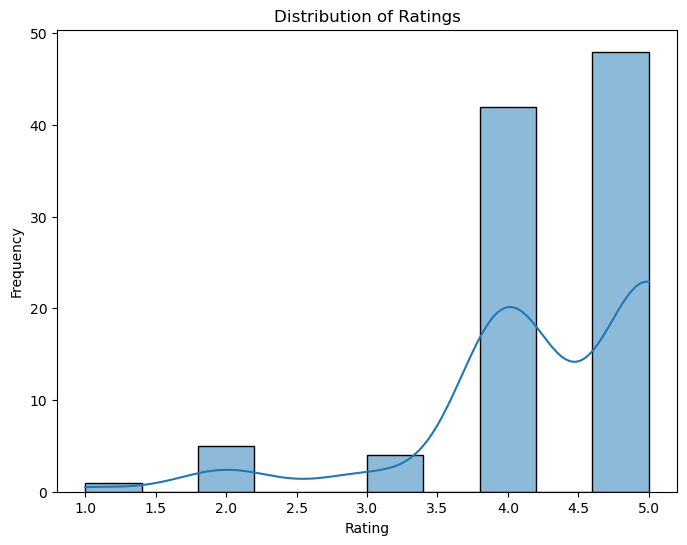

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


I regret to inform you that I was unable to locate a dataset containing a distinct 'Cuisines' column. Consequently, I was unable to employ data visualization techniques to identify the most popular cuisines based on the available data.

In [10]:
from nltk.tokenize import word_tokenize
from collections import Counter


# Tokenize the text in the "Review" column
df['Tokenized Review'] = df['Review'].apply(word_tokenize)

# Count word frequencies
word_counts = Counter(word for words in df['Tokenized Review'] for word in words)

# Get the top N most common words
top_n = 50  # Change this to the desired number of top words
most_common_words = word_counts.most_common(top_n)

# Filter out words with a length of 1 (typically punctuation)
most_common_words = [(word, freq) for word, freq in most_common_words if len(word) > 2]

# Print the filtered most common words
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")


and: 156
the: 137
was: 72
food: 68
The: 49
with: 46
...: 46
place: 44
you: 41
good: 39
for: 39
More: 38
very: 32
restaurant: 29
this: 29
are: 27
but: 27
here: 24
service: 24
have: 22
Nepali: 22
not: 21
This: 20
had: 20
set: 19
delicious: 18
thali: 18
local: 17
try: 16
Nepal: 15
friendly: 15
Kathmandu: 15
Thamel: 15


In [ ]:
from wordcloud import WordCloud

# Create a dictionary of word frequencies
word_freq_dict = dict(most_common_words)

# Initialize WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate_from_frequencies(word_freq_dict)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Part 4: Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation


# For simplicity, let's consider ratings 4 and 5 as positive, 3 as neutral, and 1 and 2 as negative
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 4 else 'neutral' if x == 3 else 'negative')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Text vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier for sentiment analysis
sentiment_classifier = MultinomialNB()
sentiment_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = sentiment_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Sentiment Analysis Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


In [ ]:
# Topic Modeling

# Text vectorization for topic modeling
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Review'])

# Apply Latent Dirichlet Allocation (LDA)
n_topics = 5  # Number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_tfidf)

# Print the top terms for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic {topic_idx+1}: {' '.join(top_terms)}")

## Part 5: Assessment & Evaluation

In [ ]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#MultinomialNB

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: {:.2f}".format(recall))


In [ ]:
# Bernoulli NB

# Import the necessary libraries
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Fitting Naive Bayes to the Training set
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy, Precision, and Recall
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred, average='weighted')  # Change average to 'micro', 'macro', or 'weighted'
score3 = recall_score(y_test, y_pred, average='weighted')  # Change average to 'micro', 'macro', or 'weighted'

print("\n")
print("Accuracy is", round(score1 * 100, 2), "%")
print("Precision is", round(score2, 2))
print("Recall is", round(score3, 2))


In [ ]:
# Logistic Regression

# Import the necessary libraries
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Fitting Logistic Regression to the Training set
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy, Precision, and Recall
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred, average='weighted')
score3 = recall_score(y_test, y_pred, average='weighted')  

print("\n")
print("Accuracy is", round(score1 * 100, 2), "%")
print("Precision is", round(score2, 2))
print("Recall is", round(score3, 2))



## Insights:
In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Three algorithms namely Multinomial Naive Bayes, Logistic Regression, and Bernoulli Naive Bayes are implemented.

Evaluation metrics used here are accuracy, precision and recall.

### Using Multinomial Naive Bayes,

Accuracy: 53.33%
Precision: 0.76
Recall: 0.53

### Using Bernoulli Naive Bayes,

Accuracy is 63.33 %
Precision is 0.54
Recall is 0.63

### Using Logistic Regression,

Accuracy is 66.67 %
Precision is 0.71
Recall is 0.67

## From the above results,  Logistic Regressions is slightly better method compared to Bernoulli Naive Bayes and, Multinomial Naive Bayes with 66.67% accuracy which means the model built for the prediction of sentiment of the restaurant review gives 66.67% right prediction.
